In [11]:
import os
import sys 

# Add the yellowbrick library to the path
sys.path.append("../../")

In [12]:
from examples.download import download_all
import pandas as pd

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

In [13]:

import yellowbrick as yb 

In [14]:
data = load_data('occupancy')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()


In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0,2,1
1,2,1


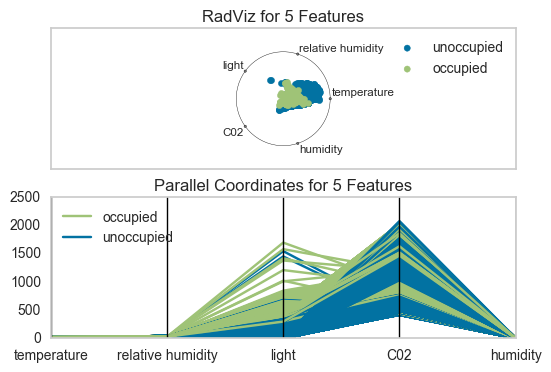

In [16]:
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.multivisualizer.base import MultiVisualizer

visualizers = [RadViz(classes=classes, features=features)
              ,ParallelCoordinates(classes=classes, features=features)
              ]

mv = MultiVisualizer(visualizers)
mv.fit(X,y)
mv.poof()

In [8]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

features = ['petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()

../..\yellowbrick\multivisualizer\base.py:25: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axarr == None:


0,2,2
1,2,2
2,2,2
3,2,2


IndexError: list index out of range

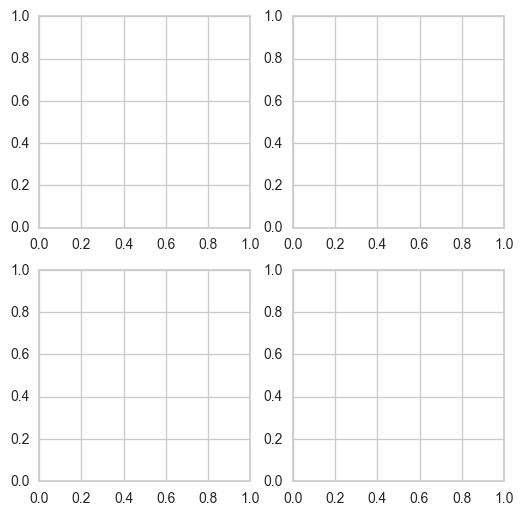

In [9]:

#Currently failing because the scatter doesn't support class slicing


from yellowbrick.multivisualizer.multiscatter import MultiClassScatter
visualizer = MultiClassScatter(classes = classes, features = features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.poof()         # Draw/show/poof the data